# Data Loading and Preprocessing

In [1]:
import pandas as pd
import scipy.stats as stats
from pandas.plotting import lag_plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
series = pd.read_csv(r"C:\Users\Pavan Yadav\Desktop\PSY\SEM 3\TimeSeries\CaseStudy\HDFCBANK.csv",
                    header=0,
                    index_col=0,
                    parse_dates=True)

series.drop(columns=['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], inplace=True)
series.columns = ['Price']

series = series.squeeze()

In [3]:
series.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
5306 non-null   float64
dtypes: float64(1)
memory usage: 82.9 KB


In [4]:
series.describe()

count    5306.000000
mean     1007.330390
std       635.675021
min       163.400000
25%       480.200000
50%       935.725000
75%      1421.000000
max      2565.800000
Name: Price, dtype: float64

# Data Visualization

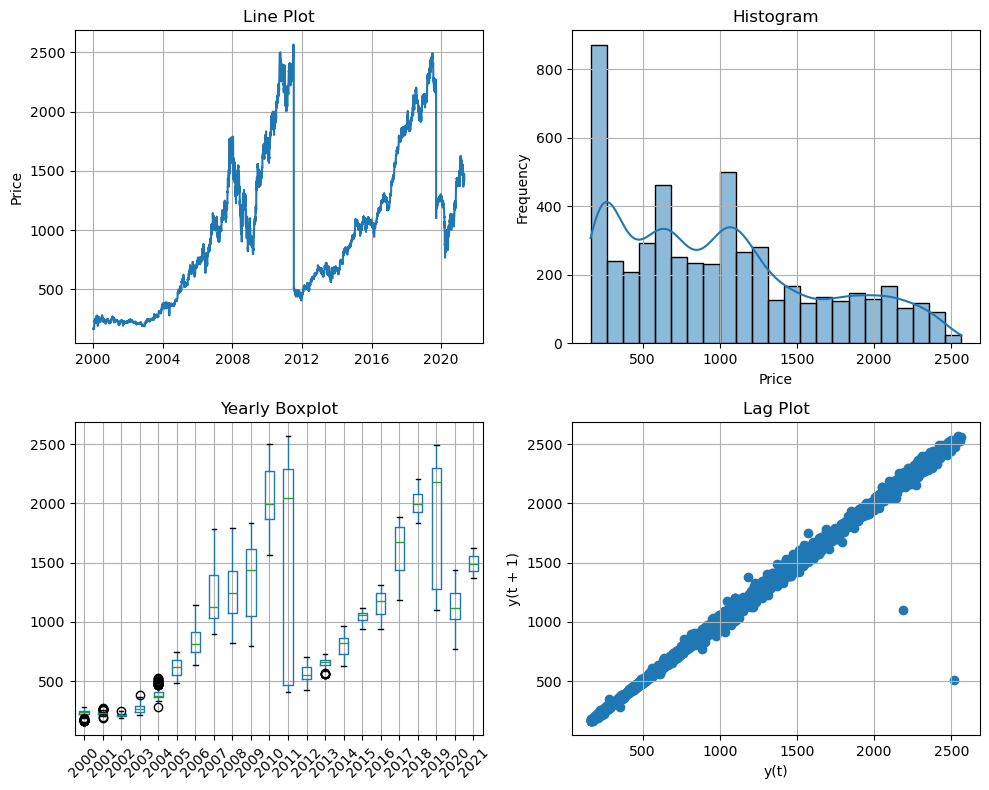

In [5]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.plot(series)
plt.title("Line Plot")
plt.ylabel("Price")
plt.grid()

plt.subplot(2,2,2)
sns.histplot(series, kde=True)
plt.title("Histogram")
plt.ylabel("Frequency")
plt.grid()

plt.subplot(2,2,3)
yearly = pd.concat([pd.DataFrame(x[1].values) for x in series.groupby(series.index.year)], axis = 1)
yearly.columns = range(2000, 2022)
yearly.boxplot()
plt.xticks(rotation=45)
plt.title("Yearly Boxplot")

plt.subplot(2,2,4)
lag_plot(series)
plt.title("Lag Plot")
plt.grid()

plt.tight_layout()
plt.show()

these charts collectively show a series with an upward trend, some significant volatility, particularly after 2008, and a distribution with a positive skew. The strong autocorrelation suggests that this series may be suitable for predictive modeling using time series methods.

# Decomposition

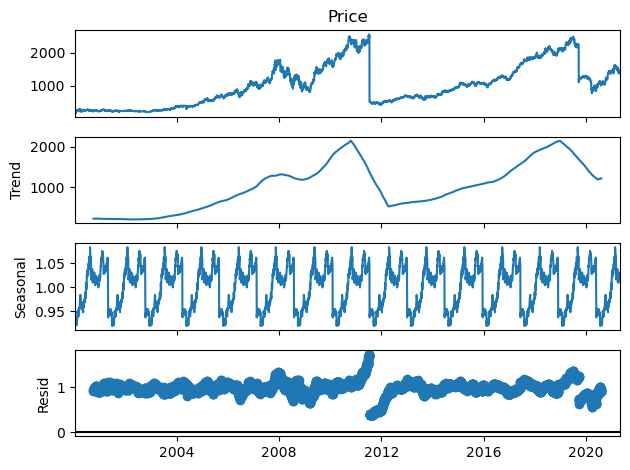

In [6]:
decomposition = seasonal_decompose(series, model='multiplicative', period=365)
decomposition.plot()
plt.show()

# Stationarity Check

## Summary Statistics

In [7]:
x = series.values
size = int(len(x)/2)
x1, x2 = x[:size], x[size:]
mean1, mean2 = x1.mean(), x2.mean()
var1, var2 = x1.var(), x2.var()
print("Mean for the first half of data: ", mean1, "Mean for the second half of data: ", mean2)
print("Variance for the first half of data: ", var1, "Variance for the second half of data: ", var2)

Mean for the first half of data:  730.760365623822 Mean for the second half of data:  1283.9004146249529
Variance for the first half of data:  288455.7259253469 Variance for the second half of data:  366575.4692516185


The first half of the data has a lower mean (730.76) and variance (288,455.73) compared to the second half, which has a higher mean (1,283.90) and variance (366,575.47), indicating an increase in both average values and variability over time.

## Augmented Dickey Fuller Test

In [8]:
result = adfuller(series.values)

print("ADF Statistics: ",result[0])
print("P-value: ",result[1])
print("Critical Values")
print(result[4])

if result[1] < 0.05:
    print("We reject the null hypothesis: the series does not have a unit root, i.e., it is stationary.")
else:
    print("We fail to reject the null hypothesis: the series has a unit root, i.e., it is non-stationary.")

ADF Statistics:  -2.2957292911379663
P-value:  0.17334905995747601
Critical Values
{'1%': -3.4315832642803406, '5%': -2.8620849763501828, '10%': -2.5670600903865166}
We fail to reject the null hypothesis: the series has a unit root, i.e., it is non-stationary.


## Differencing

In [9]:
series_diff = series.diff(1)

result = adfuller(series_diff[1:].values)

print("ADF Statistics: ",result[0])
print("P-value: ",result[1])
print("Critical Values")
print(result[4])

if result[1] < 0.05:
    print("We reject the null hypothesis: the series does not have a unit root, i.e., it is stationary.")
else:
    print("We fail to reject the null hypothesis: the series has a unit root, i.e., it is non-stationary.")

ADF Statistics:  -73.37370374953949
P-value:  0.0
Critical Values
{'1%': -3.431583496908906, '5%': -2.8620850791268344, '10%': -2.567060145098096}
We reject the null hypothesis: the series does not have a unit root, i.e., it is stationary.


After differencing the series does not have any unit roots i.e. time dependent components thus making it stationary

# Train Test Split

In [10]:
split = int(len(series)*0.8)
train, test = series[:split], series[split:]

print("Actual Data Size: ",len(series))
print("Train Data Size: ",len(train))
print("Test Data Size: ",len(test))

Actual Data Size:  5306
Train Data Size:  4244
Test Data Size:  1062


# ARIMA

## Plotting ACF and PACF

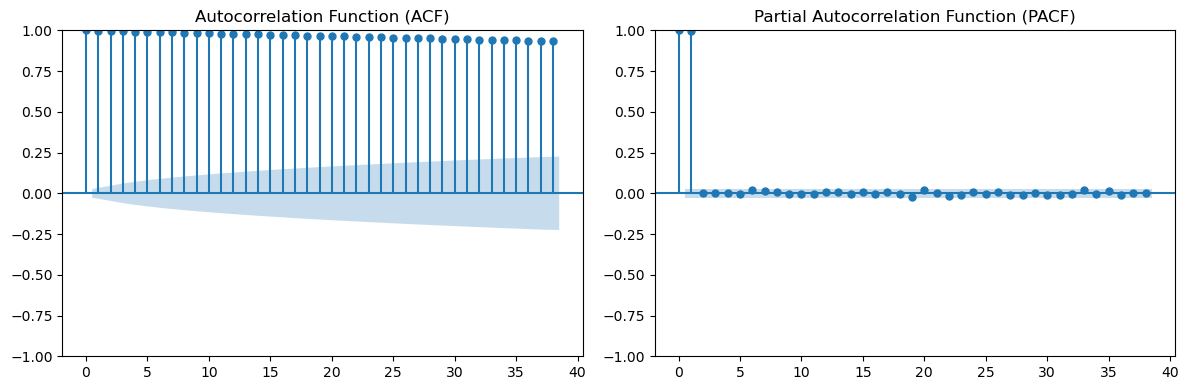

In [11]:
plt.figure(figsize=(12, 4))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(series, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(series, ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

## ARIMA

C:\Users\Pavan Yadav\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pavan Yadav\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pavan Yadav\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pavan Yadav\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return ge

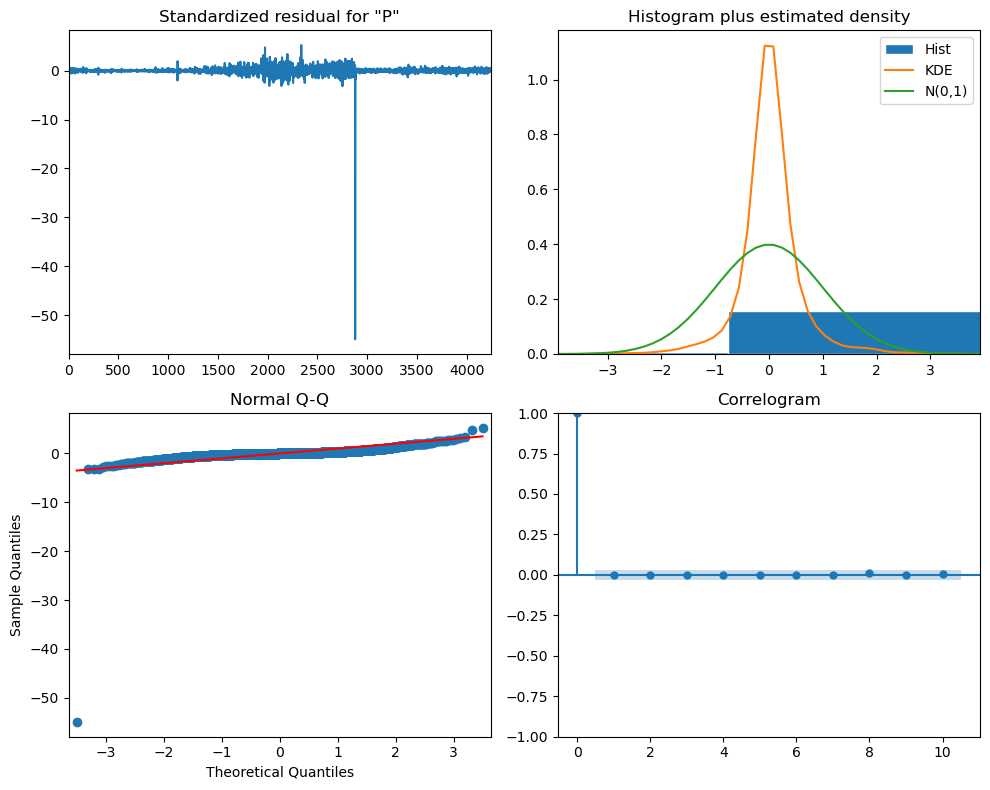

RMSE: 614.121


In [12]:
model = ARIMA(train, order=(5, 1, 1))
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(test))
resid = model_fit.resid
rmse = np.sqrt(mean_squared_error(test, y_pred))   
model_fit.plot_diagnostics(figsize=(10, 8))
plt.tight_layout()
plt.show()
print(f'RMSE: {rmse:.3f}')

# Residual Analysis

In [13]:
residuals = model_fit.resid

## Outlier Detection and Removal using IQR method

In [14]:
Q1 = residuals.quantile(0.25)
Q3 = residuals.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = residuals[(residuals < lower_bound) | (residuals > upper_bound)]
residuals_cleaned = residuals[(residuals >= lower_bound) & (residuals <= upper_bound)]

## Plotting the cleaned residauls

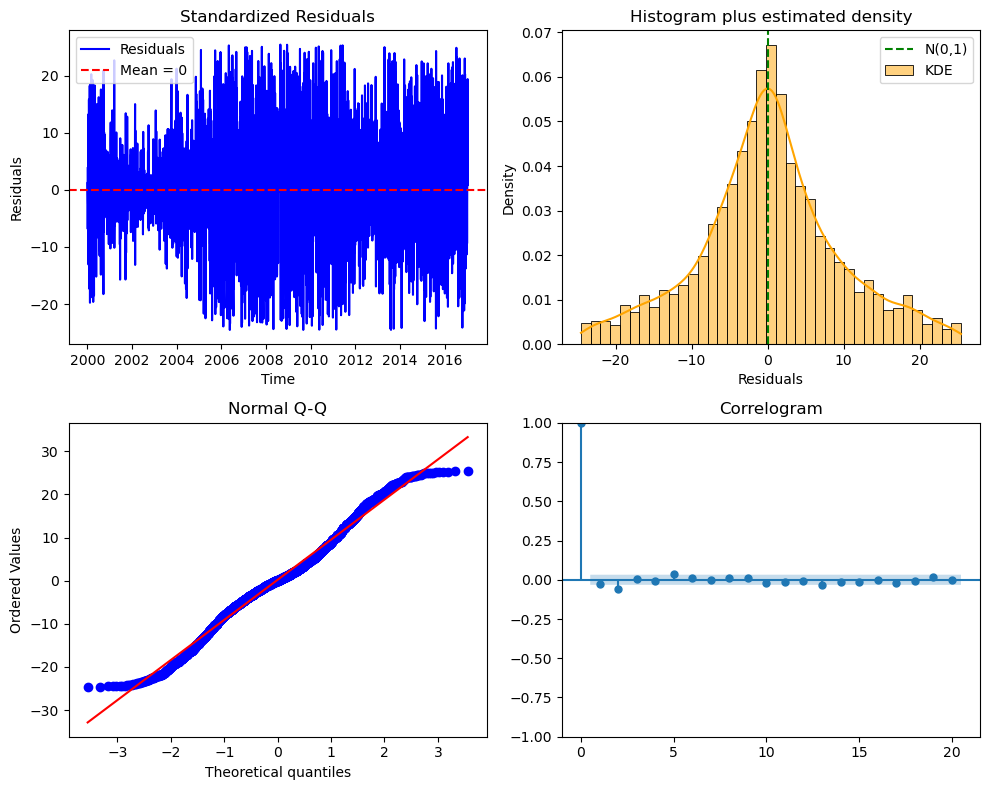

In [16]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(residuals_cleaned, color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Mean = 0')
plt.title('Standardized Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(residuals_cleaned, kde=True, stat="density", color='orange', label='KDE')
plt.axvline(0, color='green', linestyle='--', label='N(0,1)')
plt.title('Histogram plus estimated density')
plt.xlabel('Residuals')
plt.legend()

plt.subplot(2, 2, 3)
stats.probplot(residuals_cleaned, dist="norm", plot=plt)
plt.title('Normal Q-Q')

plt.subplot(2, 2, 4)
plot_acf(residuals_cleaned, lags=20, ax=plt.gca())
plt.title('Correlogram')

plt.tight_layout()
plt.show()